<a href="https://colab.research.google.com/github/Pushkar004/Data_Science_Projects/blob/main/Image_Classification_Cifar10_dataset/Project3_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
import tensorflow as tf                                         #Importing useful libraries
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [141]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [142]:
#importing Cifar10 dataset
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [143]:
# Check the shape of training and test data
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test labels shape: {y_test.shape}")

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Training labels shape: (50000, 1)
Test labels shape: (10000, 1)


Observation:

1.Training data consist of 50,000 images while test data consists of 10,000 images each of size 32x32 with 3 color channels.

2.Training amnd test labels comnsist of 50,000 and 10,000 labels respectively corresponding to each image

In [144]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [145]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [146]:
unique, counts = np.unique(y_train, return_counts=True)                           # finding the count for each labels

# Displaying the diggerent label count as a dictionary (label: count)
label_counts = dict(zip(unique.flatten(), counts))
print(label_counts)

{0: 5000, 1: 5000, 2: 5000, 3: 5000, 4: 5000, 5: 5000, 6: 5000, 7: 5000, 8: 5000, 9: 5000}


**Observation: All the classes of image are equal. So no need for class balancing**

In [147]:
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)

In [148]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']  #class_name list with index respective to numbers given as labels

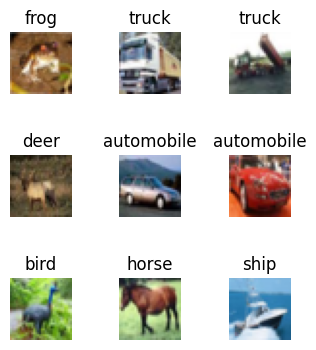

In [149]:
# Visualize 9 images from the training set
plt.figure(figsize=(4,4))
for i in range(9):
    plt.subplot(3, 3, i+1) #subplot() function creates subplot insidelarger figure, and parameters (3, 3, i+1) mean 3 rows, 3 columns, and i+1th position(index starts at 1, not 0).
    plt.imshow(x_train[i]) # imshow() function is used to display an image from an array of pixel values.
    plt.title(f"{class_names[y_train[i]]}")
    plt.axis('off')
    plt.subplots_adjust(hspace=1)
plt.show()

In [150]:
# Checking if any images have incorrect dimensions
incorrect_dimensions = [i for i, img in enumerate(x_train) if img.shape != (32, 32, 3)]
print(f"Number of images with incorrect dimensions: {len(incorrect_dimensions)}")

Number of images with incorrect dimensions: 0


In [151]:
# Checking for out-of-range pixel values
pixel_min = x_train.min()
pixel_max = x_train.max()
print(f"Pixel value range: {pixel_min} to {pixel_max}")

Pixel value range: 0 to 255


Observation: All the images are in range 0 to 255 pixel value with same dimenion of (32,32,3)

In [152]:
# Normalizing the pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Using CNN

In [153]:
# Initializing the CNN model
model = models.Sequential()

# Adding Convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Adding 2nd Convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Adding 3rd Convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flattening the output from the convolutional layers
model.add(layers.Flatten())

# Adding Fully connected (Dense) layer
model.add(layers.Dense(64, activation='relu'))

# Adding Output layer (10 classes for CIFAR-10)
model.add(layers.Dense(10))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [154]:
#Compiling the model

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [155]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 46ms/step - accuracy: 0.3381 - loss: 1.7792 - val_accuracy: 0.5228 - val_loss: 1.3390
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 44ms/step - accuracy: 0.5524 - loss: 1.2512 - val_accuracy: 0.6083 - val_loss: 1.1012
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.6228 - loss: 1.0748 - val_accuracy: 0.6315 - val_loss: 1.0505
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.6557 - loss: 0.9706 - val_accuracy: 0.6538 - val_loss: 0.9815
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 44ms/step - accuracy: 0.6851 - loss: 0.8976 - val_accuracy: 0.6551 - val_loss: 0.9724
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.7081 - loss: 0.8319 - val_accuracy: 0.6888 - val_loss: 0.8858
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 44ms/step - accuracy: 0.7253 - loss: 0.7810 - val_accuracy: 0.6804 - val_loss: 0.9333
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 45ms/step - accuracy: 0.7409 -

In [156]:
model.save('/content/drive/MyDrive/Learn_tube/model.keras')

In [157]:
from tensorflow.keras.models import load_model
model_load = load_model('/content/drive/MyDrive/Learn_tube/model.keras')

In [158]:
model_load.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6940 - loss: 0.8806


[0.8856476545333862, 0.6948000192642212]

In [159]:
y_pred= model_load.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


In [160]:
y_pred

array([[-1.4134272 , -2.836403  , -0.30173248, ..., -1.9511335 ,
         0.15882991, -2.3412304 ],
       [ 4.4305925 ,  0.7871045 , -3.0934072 , ..., -7.721582  ,
         8.0570545 ,  0.110064  ],
       [ 0.50266284, -1.5928035 ,  0.8938533 , ..., -0.63667357,
         2.7930653 ,  0.5043162 ],
       ...,
       [-4.1220274 , -4.984651  ,  1.2782515 , ...,  2.432109  ,
        -6.4197345 , -5.773242  ],
       [-0.92042065,  1.8971791 , -0.8910849 , ..., -1.1993027 ,
        -5.7534885 , -2.0793262 ],
       [-4.770712  , -7.1791673 , -0.82858473, ...,  9.490655  ,
        -9.043429  , -4.196681  ]], dtype=float32)

In [161]:
y_pred_class = np.argmax(y_pred, axis=1)

In [162]:
y_pred_class

array([3, 8, 8, ..., 5, 4, 7])

In [163]:
#Flattening the true labels (y_test is originally 2D, e.g. (10000, 1))
y_test_flat = y_test.ravel()


In [164]:
from sklearn.metrics import classification_report
Img_Classificationreport = classification_report(y_test_flat, y_pred_class, target_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

In [165]:
print(Img_Classificationreport)

              precision    recall  f1-score   support

    airplane       0.72      0.77      0.74      1000
  automobile       0.88      0.75      0.81      1000
        bird       0.58      0.62      0.60      1000
         cat       0.48      0.51      0.49      1000
        deer       0.68      0.59      0.64      1000
         dog       0.55      0.62      0.58      1000
        frog       0.72      0.81      0.76      1000
       horse       0.79      0.69      0.73      1000
        ship       0.85      0.79      0.82      1000
       truck       0.79      0.80      0.79      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.70     10000
weighted avg       0.70      0.69      0.70     10000



# Using different techniques to increase CNN accuracy

**1.Data Augmentation**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,  # Randomly rotate images by 20 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally by 20%
    height_shift_range=0.2,  # Randomly shift images vertically by 20%
    horizontal_flip=True  # Randomly flip images horizontally
)
datagen.fit(x_train)

In [ ]:
# Initializing the CNN model
model2 = models.Sequential()

# Adding Convolutional layer
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model2.add(layers.MaxPooling2D((2, 2)))

# Adding 2nd Convolutional layer
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))

# Adding 3rd Convolutional layer
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flattening the output from the convolutional layers
model2.add(layers.Flatten())

# Adding Fully connected (Dense) layer
model2.add(layers.Dense(64, activation='relu'))

# Adding Output layer (10 classes for CIFAR-10)
model2.add(layers.Dense(10))

In [ ]:
#Compiling the model (same structure to compare the accuracy)

model2.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
history2 = model2.fit(datagen.flow(x_train, y_train, batch_size=64),epochs=10, validation_data=(x_test, y_test))

In [ ]:
model2.save('/content/drive/MyDrive/Learn_tube/model2.keras')

In [69]:
model2_load = load_model('/content/drive/MyDrive/Learn_tube/model2.keras')

In [70]:
model2_load.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6448 - loss: 1.0188


[1.0285624265670776, 0.6391000151634216]

In [71]:
y_pred2= model2_load.predict(x_test)
y_pred_class2 = np.argmax(y_pred2, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


In [72]:
Img_Classificationreport2 = classification_report(y_test_flat, y_pred_class2, target_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
print(Img_Classificationreport2)

              precision    recall  f1-score   support

    airplane       0.70      0.72      0.71      1000
  automobile       0.64      0.86      0.74      1000
        bird       0.65      0.47      0.54      1000
         cat       0.48      0.40      0.44      1000
        deer       0.78      0.35      0.48      1000
         dog       0.60      0.59      0.59      1000
        frog       0.57      0.81      0.67      1000
       horse       0.67      0.68      0.67      1000
        ship       0.83      0.72      0.77      1000
       truck       0.59      0.81      0.68      1000

    accuracy                           0.64     10000
   macro avg       0.65      0.64      0.63     10000
weighted avg       0.65      0.64      0.63     10000



Obsevation: Applying data augmentation has not increased accuracy for the same model structure

**2.Adding Batch normalization, dropout layers and more convolutional layers**

In [ ]:
# Build the CNN model with additional layers, batch normalization, and dropout
model3 = models.Sequential()

# 1st Convolutional Block
model3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model3.add(layers.BatchNormalization())
model3.add(layers.Conv2D(32, (3, 3), activation='relu'))
model3.add(layers.BatchNormalization())
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Dropout(0.25))

# 2nd Convolutional Block
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.BatchNormalization())
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.BatchNormalization())
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Dropout(0.25))

# 3rd Convolutional Block
model3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model3.add(layers.BatchNormalization())
model3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model3.add(layers.BatchNormalization())
model3.add(layers.Dropout(0.4))

# Flatten and Fully Connected Layers
model3.add(layers.Flatten())
model3.add(layers.Dense(128, activation='relu'))
model3.add(layers.BatchNormalization())
model3.add(layers.Dropout(0.5))  # Dropout to prevent overfitting

# Output layer
model3.add(layers.Dense(10, activation='softmax'))


In [ ]:
#Compiling the model (same structure to compare the accuracy)

model3.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
history3 = model3.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

In [ ]:
model3.save('/content/drive/MyDrive/Learn_tube/model3.keras')

In [73]:
model3_load = load_model('/content/drive/MyDrive/Learn_tube/model3.keras')

In [74]:
model3_load.evaluate(x_test, y_test)

/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step - accuracy: 0.7896 - loss: 0.6299


[0.6279165148735046, 0.7904999852180481]

In [75]:
y_pred3= model3_load.predict(x_test)
y_pred_class3 = np.argmax(y_pred3, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 45ms/step


In [76]:
Img_Classificationreport3 = classification_report(y_test_flat, y_pred_class3, target_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
print(Img_Classificationreport3)

              precision    recall  f1-score   support

    airplane       0.84      0.73      0.78      1000
  automobile       0.93      0.90      0.91      1000
        bird       0.79      0.61      0.69      1000
         cat       0.62      0.62      0.62      1000
        deer       0.80      0.77      0.78      1000
         dog       0.63      0.79      0.70      1000
        frog       0.81      0.87      0.84      1000
       horse       0.84      0.84      0.84      1000
        ship       0.82      0.92      0.86      1000
       truck       0.87      0.87      0.87      1000

    accuracy                           0.79     10000
   macro avg       0.80      0.79      0.79     10000
weighted avg       0.80      0.79      0.79     10000



Observation:Adding Batch normalization, dropout layers and more convolutional layers has further increased the accuracy

Early stopping and increased epochs

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
# Using same architecture as previous
model4 = models.Sequential()

# 1st Convolutional Block
model4.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model4.add(layers.BatchNormalization())
model4.add(layers.Conv2D(32, (3, 3), activation='relu'))
model4.add(layers.BatchNormalization())
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Dropout(0.25))

# 2nd Convolutional Block
model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(layers.BatchNormalization())
model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(layers.BatchNormalization())
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Dropout(0.25))

# 3rd Convolutional Block
model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.BatchNormalization())
model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.BatchNormalization())
model4.add(layers.Dropout(0.4))

# Flatten and Fully Connected Layers
model4.add(layers.Flatten())
model4.add(layers.Dense(128, activation='relu'))
model4.add(layers.BatchNormalization())
model4.add(layers.Dropout(0.5))  # Dropout to prevent overfitting

# Output layer
model4.add(layers.Dense(10, activation='softmax'))


In [ ]:
#Compiling the model (same structure to compare the accuracy)

model4.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# Early stopping and saving the best model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('/content/drive/MyDrive/Learn_tube/best_model_e50.keras', save_best_only=True)

# Train the model with early stopping
history4 = model4.fit(x_train, y_train,epochs=50, validation_data=(x_test, y_test),callbacks=[early_stopping, model_checkpoint])

In [85]:
from tensorflow.keras.models import load_model

# Load the model
model4_load = load_model('/content/drive/MyDrive/Learn_tube/best_model_e50.keras')

In [86]:
model4_load.evaluate(x_test, y_test)

/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.8233 - loss: 0.5309


[0.5341837406158447, 0.8223999738693237]

In [79]:
y_pred4= model4_load.predict(x_test)
y_pred_class4 = np.argmax(y_pred4, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step


In [80]:
#Flattening the true labels (y_test is originally 2D, e.g. (10000, 1))
y_test_flat = y_test.ravel()

In [81]:
from sklearn.metrics import classification_report
Img_Classificationreport4 = classification_report(y_test_flat, y_pred_class4, target_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
print(Img_Classificationreport4)

              precision    recall  f1-score   support

    airplane       0.82      0.84      0.83      1000
  automobile       0.94      0.90      0.92      1000
        bird       0.78      0.70      0.74      1000
         cat       0.68      0.64      0.66      1000
        deer       0.81      0.81      0.81      1000
         dog       0.71      0.78      0.75      1000
        frog       0.85      0.88      0.87      1000
       horse       0.84      0.88      0.86      1000
        ship       0.89      0.90      0.89      1000
       truck       0.91      0.88      0.90      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



Observation: After increasing epoch and early stopping, best accuracy is reached

# **Using Resnet**

In [ ]:
# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train2 = to_categorical(y_train, 10)
y_test2 = to_categorical(y_test, 10)


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the ResNet50 model pre-trained on ImageNet, excluding the top layer
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze all layers except for the last 10 layers. Only last 10 layers will be trained. Early and middle layers are layers that are used for more general training of images.
# Resnet is already pretrained model. So, no need to learn basic image features. However The later layers in the network typically learn more task-specific features.
#By unfreezing the last 10 layers, we allow them to adjust and fine-tune for the CIFAR-10 dataset.

for layer in resnet_model.layers[:-10]:
    layer.trainable = False

# Add custom layers
x = resnet_model.output           #This is the feature map generated by the final convolutional layer of ResNet.
x = GlobalAveragePooling2D()(x)   #global average pooling takes average of each feature map and reduces spatial dimensions (height and width) to a single number per feature map.
x = Dense(512, activation='relu')(x) #It’s a learnable layer that will transform the output from the previous layer (the feature map) into a vector of 512 features.
x = Dense(10, activation='softmax', dtype='float32')(x)  # Use float32 for final layer

# Create the model
model5 = Model(inputs=resnet_model.input, outputs=x)

# Compile the model with AdamW optimizer
model5.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Data augmentation to improve performance
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)


# Early stopping to prevent overfitting (stops when validation loss doesn't improve)
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=10,         # Number of epochs with no improvement after which training will be stopped
    verbose=1,
    restore_best_weights=True  # Restore model weights from the epoch with the best loss
)

# Model checkpoint to save the best model during training
model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Learn_tube/best_resnet50_cifar10.keras',  # Filepath to save the best model
    monitor='val_accuracy',      # Monitor validation accuracy
    save_best_only=True,         # Save only the best model (based on validation accuracy)
    verbose=1
)

# Reduce learning rate when the validation loss plateaus
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',          # Monitor validation loss
    factor=0.2,                  # Reduce learning rate by a factor of 0.2
    patience=5,                  # Number of epochs with no improvement before reducing learning rate
    min_lr=1e-6,                 # Minimum learning rate after reduction
    verbose=1
)

# Add these callbacks to the fit function
callbacks = [early_stopping, model_checkpoint, reduce_lr]





In [ ]:

batch_size = 64
history5 = model5.fit(datagen.flow(x_train, y_train2, batch_size=batch_size), epochs=30,validation_data=(x_test, y_test2),callbacks=callbacks)

In [166]:
model5_load = load_model('/content/drive/MyDrive/Learn_tube/best_resnet50_cifar10.keras')

In [167]:
# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train2 = to_categorical(y_train, 10)
y_test2 = to_categorical(y_test, 10)

In [168]:
model5_load.evaluate(x_test, y_test2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 48s 138ms/step - accuracy: 0.3758 - loss: 2.4096


[2.428081750869751, 0.37470000982284546]

In [90]:
y_pred5= model5_load.predict(x_test)
y_pred_class5 = np.argmax(y_pred5, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 47s 144ms/step


In [91]:
Img_Classificationreport5 = classification_report(y_test_flat, y_pred_class5, target_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
print(Img_Classificationreport5)

              precision    recall  f1-score   support

    airplane       0.53      0.59      0.56      1000
  automobile       0.29      0.87      0.44      1000
        bird       0.71      0.06      0.12      1000
         cat       0.40      0.08      0.14      1000
        deer       0.88      0.01      0.01      1000
         dog       0.66      0.15      0.24      1000
        frog       0.25      0.84      0.39      1000
       horse       0.68      0.30      0.42      1000
        ship       0.59      0.64      0.61      1000
       truck       0.43      0.20      0.27      1000

    accuracy                           0.37     10000
   macro avg       0.54      0.37      0.32     10000
weighted avg       0.54      0.37      0.32     10000



Observation: Resnet is a pretrained model trained on imagenet dataset. We have trained only last 10 layers of the model. The accuracy is genrally good. But here accruracy is lesser than conventional CNN because the model is more suited to large dataset. Cifar 10 dataset has comparetively smaller size 32x32

**Training all layers of Resnet**

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the ResNet50 model pre-trained on ImageNet, excluding the top layer
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add custom layers
x = resnet_model.output           #This is the feature map generated by the final convolutional layer of ResNet.
x = GlobalAveragePooling2D()(x)   #global average pooling takes average of each feature map and reduces spatial dimensions (height and width) to a single number per feature map.
x = Dense(512, activation='relu')(x) #It’s a learnable layer that will transform the output from the previous layer (the feature map) into a vector of 512 features.
x = Dense(10, activation='softmax', dtype='float32')(x)  # Use float32 for final layer

# Create the model
model6 = Model(inputs=resnet_model.input, outputs=x)

# Compile the model with AdamW optimizer
model6.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Early stopping to prevent overfitting (stops when validation loss doesn't improve)
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=10,         # Number of epochs with no improvement after which training will be stopped
    verbose=1,
    restore_best_weights=True  # Restore model weights from the epoch with the best loss
)

# Model checkpoint to save the best model during training
model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Learn_tube/best_resnet50_cifar10_2.keras',  # Filepath to save the best model
    monitor='val_accuracy',      # Monitor validation accuracy
    save_best_only=True,         # Save only the best model (based on validation accuracy)
    verbose=1
)

# Reduce learning rate when the validation loss plateaus
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',          # Monitor validation loss
    factor=0.2,                  # Reduce learning rate by a factor of 0.2
    patience=5,                  # Number of epochs with no improvement before reducing learning rate
    min_lr=1e-6,                 # Minimum learning rate after reduction
    verbose=1
)

# Add these callbacks to the fit function
callbacks = [early_stopping, model_checkpoint, reduce_lr]


In [ ]:

batch_size = 64
history6 = model6.fit(x_train, y_train2, epochs=30,validation_data=(x_test, y_test2),callbacks=callbacks)

In [92]:
model6_load = load_model('/content/drive/MyDrive/Learn_tube/best_resnet50_cifar10_2.keras')

In [93]:
model6_load.evaluate(x_test, y_test2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 53s 137ms/step - accuracy: 0.6867 - loss: 0.9093


[0.9227740168571472, 0.6869000196456909]

In [94]:
y_pred6= model6_load.predict(x_test)
y_pred_class6 = np.argmax(y_pred6, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 47s 143ms/step


In [95]:
Img_Classificationreport6 = classification_report(y_test_flat, y_pred_class6, target_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
print(Img_Classificationreport6)

              precision    recall  f1-score   support

    airplane       0.74      0.67      0.70      1000
  automobile       0.78      0.84      0.81      1000
        bird       0.72      0.45      0.56      1000
         cat       0.52      0.48      0.50      1000
        deer       0.63      0.73      0.67      1000
         dog       0.66      0.49      0.56      1000
        frog       0.67      0.85      0.75      1000
       horse       0.66      0.85      0.75      1000
        ship       0.78      0.68      0.73      1000
       truck       0.74      0.82      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.68     10000
weighted avg       0.69      0.69      0.68     10000



Observation: Training all layers of Resnet is computationally more heavy. Results show that accuracy has improved but still less than conventional CNN. During training, it was observed that as epoch increses, the model is overfitting the data as training accuracy is increasing but validation accuracy is reducing. This was checked by eraly stopping. Above reasons suggest that for samller size images like Cifar10 dataset, conventional CNN is more suited than pretrained RESNET